# Wstęp do uczenia maszynowego - praca domowa nr 3

#### Budowniczy: Jędrzej Sokołowski, Filip Szympliński
#### Walidatorzy: Malwina Wojewoda i Jakub Piwko
#### 8 kwietnia 2022

Komentarze walidacji oznaczane **W:**

### Wczytanie pakietów oraz danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
import copy
warnings.filterwarnings('ignore')

# ustawia domyślną wielkość wykresów
plt.rcParams['figure.figsize'] = (6,8)
# to samo tylko dla tekstu
plt.rcParams['font.size'] = 16
# ustawia wielkość tekstów dla wykresów seaborn zależną od wielkości wykresu
sns.set_context('paper', font_scale=1.4)

In [2]:
data = pd.read_csv("data.csv", sep=",")

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
from sklearn.model_selection import train_test_split

X = data.drop("Bankrupt?", axis=1)
y = data["Bankrupt?"]
y = y.astype('int')

X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, random_state=420, test_size=0.2)

In [5]:
data_train_test = pd.concat([X_train_test, y_train_test], axis = 1)
data_val = pd.concat([X_val, y_val], axis=1)

### Analiza braków danych

In [6]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 4764 to 2487
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  1364 non-null   float64
 1    ROA(A) before interest and % after tax                   1364 non-null   float64
 2    ROA(B) before interest and depreciation after tax        1364 non-null   float64
 3    Operating Gross Margin                                   1364 non-null   float64
 4    Realized Sales Gross Margin                              1364 non-null   float64
 5    Operating Profit Rate                                    1364 non-null   float64
 6    Pre-tax net Interest Rate                                1364 non-null   float64
 7    After-tax net Interest Rate                              1364 non-null   float64
 8    Non-industry i

Wszystkie dane są liczbami

In [7]:
sum(list(data_val.isna().sum()))

0

In [8]:
sum(data_val[data_val == -1].count())

0

W zbiorze walidacyjnym nie ma braków danych, tak samo jak było w zbiorze treningowym.

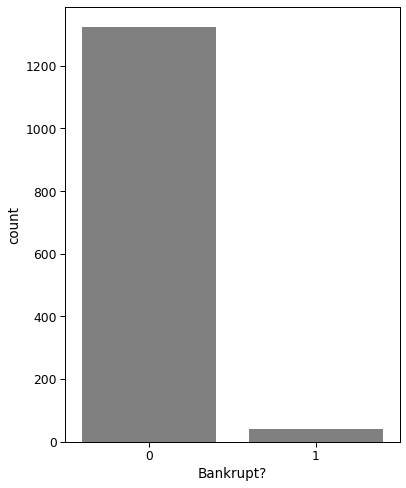

In [9]:
sns.countplot(x="Bankrupt?", data=data_val, color='gray')

Proporcje klas mają identyczne proporcje w zbiorze walidacyjnym. 

---

## Preprocessing

### Outliery

Outliery zastępimy wartościami granicznymi, policzonymi dla zbioru treningowego, dla którego przedział outlierów jest przy 2,5% końców przedziałów. 

In [10]:
#przed
data_val.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,...,1.364000e+03,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.0,1364.000000,1364.000000
mean,0.505489,0.558745,0.553521,0.607703,0.607706,0.998930,0.797268,0.809180,0.303394,0.781522,...,2.281085e+07,0.624352,0.607701,0.840348,0.280420,0.027350,0.565732,1.0,0.049202,0.030059
std,0.061609,0.067980,0.062403,0.024151,0.024163,0.001192,0.005019,0.004808,0.006636,0.002140,...,4.379566e+08,0.016039,0.024151,0.012856,0.020809,0.009770,0.007767,0.0,0.050826,0.170811
min,0.216984,0.090711,0.171637,0.000000,0.000000,0.962961,0.616328,0.636191,0.062507,0.712333,...,1.085313e-04,0.408682,0.000000,0.442176,0.199162,0.020760,0.500799,1.0,0.008950,0.000000
25%,0.477502,0.535775,0.528187,0.600906,0.600881,0.998971,0.797389,0.809314,0.303468,0.781569,...,9.064894e-04,0.623644,0.600904,0.840140,0.276820,0.026791,0.565158,1.0,0.025311,0.000000
50%,0.501828,0.558929,0.551314,0.606606,0.606621,0.999020,0.797467,0.809377,0.303528,0.781636,...,2.000487e-03,0.623879,0.606606,0.841103,0.278586,0.026807,0.565241,1.0,0.034999,0.000000
75%,0.535941,0.588244,0.583971,0.614260,0.614233,0.999099,0.797577,0.809468,0.303588,0.781734,...,4.912516e-03,0.624149,0.614258,0.842337,0.281100,0.026913,0.565723,1.0,0.055371,0.000000
max,1.000000,0.954536,0.957760,0.665151,0.665151,0.999644,0.809513,0.821053,0.329207,0.795631,...,9.390000e+09,1.000000,0.665149,0.902744,1.000000,0.367190,0.735958,1.0,0.881018,1.000000


In [11]:
col_names = data_val.columns
for col in col_names:
    tmp_data1 = data_train_test[col]
    upper_lim1 = tmp_data1.quantile(.975)
    lower_lim1 = tmp_data1.quantile(.025)
    data_val[col] = np.where(data_val[col] < upper_lim1, data_val[col], upper_lim1)
    data_val[col] = np.where(data_val[col] > lower_lim1, data_val[col], lower_lim1)

In [12]:
#po
data_val.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
count,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,...,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.0,1364.000000,1364.000000
mean,0.505404,0.559104,0.553957,0.608550,0.608546,0.999017,0.797442,0.809352,0.303524,0.781611,...,0.006049,0.623837,0.608548,0.840863,0.279591,0.026952,0.565499,1.0,0.046547,0.030059
std,0.052584,0.054480,0.052219,0.010922,0.010932,0.000154,0.000262,0.000236,0.000209,0.000244,...,0.012852,0.001068,0.010923,0.002501,0.003843,0.000566,0.001308,0.0,0.032206,0.170811
min,0.384173,0.418096,0.427654,0.589694,0.589667,0.998492,0.796485,0.808469,0.302887,0.780734,...,0.000252,0.619922,0.589691,0.832546,0.275320,0.026090,0.561494,1.0,0.015390,0.000000
25%,0.477502,0.535775,0.528187,0.600906,0.600881,0.998971,0.797389,0.809314,0.303468,0.781569,...,0.000906,0.623644,0.600904,0.840140,0.276820,0.026791,0.565158,1.0,0.025311,0.000000
50%,0.501828,0.558929,0.551314,0.606606,0.606621,0.999020,0.797467,0.809377,0.303528,0.781636,...,0.002000,0.623879,0.606606,0.841103,0.278586,0.026807,0.565241,1.0,0.034999,0.000000
75%,0.535941,0.588244,0.583971,0.614260,0.614233,0.999099,0.797577,0.809468,0.303588,0.781734,...,0.004913,0.624149,0.614258,0.842337,0.281100,0.026913,0.565723,1.0,0.055371,0.000000
max,0.627078,0.675313,0.670408,0.640523,0.640311,0.999326,0.797918,0.809763,0.304101,0.782045,...,0.074388,0.626991,0.640524,0.845016,0.292928,0.029803,0.569747,1.0,0.158080,1.000000


Zastąpienie outlierów wartościami granicznymi jest jak najbardziej w porządku. Jak widać w sumarycznych statystykach dla danych przed i po, niektóre zmienne miały wyraźnie odstające wartości. Udało nam się zmniejszyc ochylenie standardowe, a średnia arytmetyczna w kolumnach pozostała bardzo zbliżona do tej sprzed zamianą outlierów.

### Skalowanie

Podobnie jak dla zbiory treningowego, wszystkie kolumny, których wartości nie zawierają się w przedziale [0, 1] zostaną przeskalowane.

In [13]:
cols_to_scale = []
for col in data_val.columns:
    if data[col].max() > 1:
        cols_to_scale.append(col)
print(cols_to_scale)
len(cols_to_scale)

[' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Revenue per person', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Inventory/Current Liability', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Cash Turnover Rate', ' Fixed Assets to Assets', ' Total assets to GNP price']


24

Kolumny, które wymagają przeskalowania są dokładnie takie same jak te, które wymagały go w zbiorze testowym.

In [14]:
for col in cols_to_scale:
    min_max_scaler1 = MinMaxScaler()
    scaled_col1 = min_max_scaler1.fit_transform(data_val[col].values.reshape(-1, 1))
    data_val[col] = scaled_col1

### Redukcja zmiennych silnie skorelowanych

In [15]:
#kopia danych żeby zrobić na nich inny rodzaj redukcji niż został zrobiony dla zbioru testowego
import copy 
data_copy = copy.deepcopy(data_val)

In [16]:
correlated_features = set()

for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= 0.95:
            colname = corr.columns[i]
            correlated_features.add(colname)

NameError: name 'corr' is not defined

In [ ]:
print(correlated_features)
print(len(correlated_features))
len(correlated_features)/data_val.shape[1]

In [ ]:
data_val.drop(labels=correlated_features, axis=1, inplace=True)

Na zbiorze walidacyjnym również 29 kolumn spełniło warunek wysokiej korelacji i tak samo je usunęliśmy. 

W zbiorze testowym były one usuwane losowo (więc tak samo zrobiliśmy dla walidayjnego), jednak lepszym rozwiązaniem wydaje się nam usuwanie tych kolumn, które mają gorszą predykcyjność. W przykładzie poniżej wykorzystaliśmy Feature Importance dla modelu Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

corr = data_copy.corr(method = 'spearman')
y = data_copy['Bankrupt?']
X = data_copy.drop('Bankrupt?', axis = 1)

Forest = RandomForestClassifier()
Forest.fit(X, y)
fi = Forest.feature_importances_
correlated_features = set()


for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= 0.95:
            if fi[i] >= fi[j]:
                correlated_features.add(corr.columns[i])
            else:
                correlated_features.add(corr.columns[j])

In [ ]:
print(correlated_features)
print(len(correlated_features))
len(correlated_features)/X.shape[1]

Korzystając z tego sposobu dostaliśmy w wyniku nieco inne kolumny do usunięcia. Można się też zastanowić nad wyborem mniejszego progu korelacji, choć delikatne zmniejszenie progu dla tego zbioru szybko zwiększa liczbę kolumn do usunięcia, więc wydaje się, że korelacja na poziomie 0.95 i 29 zmiennych to optymalne wartości, aby nie pozbyć się za dużo informacji.

### Zmiana kierunku zmiennych

In [ ]:
corr = data_val.corr(method = 'spearman')
(corr["Bankrupt?"] < 0).sum()

In [ ]:
columns = data_val.drop("Bankrupt?", axis=1).columns
for col in columns:
    if corr["Bankrupt?"][col] < 0:
      data_val[col] *= -1

In [ ]:
corr = data_val.corr(method = 'spearman')
(corr["Bankrupt?"] < 0).sum()

W zbiorze walidacyjnym jedna zmienna mniej miała ujemną korelacją Spearmana niż jak było to w przypakdu zbioru testowego. Zapewne była to zmienna, której moduł korelacji jest bardzo mały.  

## Modelowanie

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from tqdm.notebook import tqdm

In [ ]:
def show_model_metrics(model, X, y):
    y_pred = model.predict(X)
    print(f"F1 score: {f1_score(y, y_pred, average=None)}")
    print(f"F1 score micro: {f1_score(y, y_pred, average='micro')}")
    print(f"F1 score weighted: {f1_score(y, y_pred, average='weighted')}")
    print(f"Precision score: {precision_score(y, y_pred, average=None)}")
    print(f"Recall score: {recall_score(y, y_pred, average=None)}")

In [ ]:
#Podział 
from sklearn.model_selection import train_test_split

X = data_train_test.drop("Bankrupt?", axis=1)
y = data_train_test["Bankrupt?"]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2)

In [ ]:
X_val = data_val.drop("Bankrupt?", axis=1)
y_val = data_val["Bankrupt?"]
y_val = y.astype('int')

## Klasyfikator `XGBClassifier`

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=1,
                    booster='gbtree', 
                    use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(xgb_clf, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(xgb_clf, X_val, y_val)

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=1,
                    booster='gbtree', 
                    use_label_encoder=False,
                    max_depth=2,
                    learning_rate=0.3
                    )
xgb_clf.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(xgb_clf, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(xgb_clf, X_test, y_test)

In [ ]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,100,5)
for trees_nr in tqdm(estimators):
    xgb_clf = xgb.XGBClassifier(n_estimators=trees_nr, max_depth=3, eval_metric='logloss').fit(X_val, y_train)
    train_score = roc_auc_score(y_train, xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_test, xgb_clf.predict(X_test))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,20,1)
for trees_nr in tqdm(estimators):
    xgb_clf = xgb.XGBClassifier(n_estimators=trees_nr, max_depth=3, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train, xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_test, xgb_clf.predict(X_test))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    xgb_clf = xgb.XGBClassifier(max_depth=depth, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train,xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_test,xgb_clf.predict(X_test))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
cols = ["n_learning_rate","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_rate = np.arange(0.01,0.2,0.02)
for rate in tqdm(n_rate):
    xgb_clf = xgb.XGBClassifier(learning_rate=rate, eval_metric='logloss').fit(X_train, y_train)
    train_score = roc_auc_score(y_train,xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_test,xgb_clf.predict(X_test))
    history = history.append(dict(zip(cols, [rate, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [rate, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_learning_rate", y = "AUC", hue = "dataset")
plt.show()

Z powyższych wyników widać, że metryką nad której wynikiem należało popracować (jeśli się by dobierało parametry) jest `Recall` dla obserwacji zbankrutowanych przedsiębiorstw.

***
***

In [ ]:
#W
xgb_clf = xgb.XGBClassifier(random_state=1,
                    booster='gbtree', 
                    use_label_encoder=False)
xgb_clf.fit(X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation train set scores")
show_model_metrics(xgb_clf, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation test set scores")
show_model_metrics(xgb_clf, X_testv, y_testv)

In [ ]:
#W
xgb_clf = xgb.XGBClassifier(random_state=1,
                    booster='gbtree', 
                    use_label_encoder=False,
                    max_depth=2,
                    learning_rate=0.3
                    )
xgb_clf.fit(X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation Train set scores")
show_model_metrics(xgb_clf, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation test set scores")
show_model_metrics(xgb_clf, X_testv, y_testv)

In [ ]:
#W
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,100,5)
for trees_nr in tqdm(estimators):
    xgb_clf = xgb.XGBClassifier(n_estimators=trees_nr, max_depth=3, eval_metric='logloss').fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv, xgb_clf.predict(X_trainv))
    val_score = roc_auc_score(y_testv, xgb_clf.predict(X_testv))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,20,1)
for trees_nr in tqdm(estimators):
    xgb_clf = xgb.XGBClassifier(n_estimators=trees_nr, max_depth=3, eval_metric='logloss').fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv, xgb_clf.predict(X_trainv))
    val_score = roc_auc_score(y_testv, xgb_clf.predict(X_testv))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    xgb_clf = xgb.XGBClassifier(max_depth=depth, eval_metric='logloss').fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_train,xgb_clf.predict(X_train))
    val_score = roc_auc_score(y_testv,xgb_clf.predict(X_testv))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_learning_rate","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_rate = np.arange(0.01,0.2,0.02)
for rate in tqdm(n_rate):
    xgb_clf = xgb.XGBClassifier(learning_rate=rate, eval_metric='logloss').fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv,xgb_clf.predict(X_trainv))
    val_score = roc_auc_score(y_testv,xgb_clf.predict(X_testv))
    history = history.append(dict(zip(cols, [rate, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [rate, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_learning_rate", y = "AUC", hue = "dataset")
plt.show()

## Klasyfikator `RandomForestClassifier`

In [ ]:
rndForest = RandomForestClassifier()
rndForest.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(rndForest, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(rndForest, X_test, y_test)

Widać tutaj mocne przetrenowanie kosztem predykcyjności dla zbankrutowanych przedsiębiorstw.

Podobnie jak w przypadku XGBoost krytyczną metryką jest `Recall` dla przedsiębiorstw, które zbankrutowały. Naturalnie F1 score dla tej klasy też nie jest najlepszy, ale to wynika z tego, że ta metryka jest zalezna od recall.

In [ ]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,300,5)
for trees_nr in tqdm(estimators):
    rf = RandomForestClassifier(n_estimators=trees_nr, max_depth=5, n_jobs=-1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_test, rf.predict(X_test))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

---

In [ ]:
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,96,3)
for trees_nr in tqdm(estimators):
    rf = RandomForestClassifier(n_estimators=trees_nr, max_depth=5, n_jobs=-1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_test, rf.predict(X_test))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

In [ ]:
sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

---

In [ ]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, n_estimators=100).fit(X_train, y_train)
    train_score = roc_auc_score(y_train,rf.predict(X_train))
    val_score = roc_auc_score(y_test,rf.predict(X_test))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

In [ ]:
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, n_estimators=100).fit(X_train, y_train)
    train_score = rf.score(X_train,y_train)
    val_score = rf.score(X_test,y_test)
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

In [ ]:
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

Różnica w skali na ostatnich dwóch wykresach jest ogromna, jedyna różnica między nimi - typ miary oceny.

In [ ]:
rndForest = RandomForestClassifier(max_depth = 6, n_estimators=100)
rndForest.fit(X_train, y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(rndForest, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(rndForest, X_test, y_test)

Co ciekawe, pomimo zmnijeszenia przetrenowania modelu (trochę) predykcyjność jest niższa.

***
***

In [ ]:
#W
rndForest = RandomForestClassifier()
rndForest.fit(X_trainv, y_trainv)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(rndForest, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(rndForest, X_testv, y_testv)

In [ ]:
#W
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,300,5)
for trees_nr in tqdm(estimators):
    rf = RandomForestClassifier(n_estimators=trees_nr, max_depth=5, n_jobs=-1).fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv, rf.predict(X_trainv))
    val_score = roc_auc_score(y_testv, rf.predict(X_testv))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_estimators","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,96,3)
for trees_nr in tqdm(estimators):
    rf = RandomForestClassifier(n_estimators=trees_nr, max_depth=5, n_jobs=-1).fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv, rf.predict(X_trainv))
    val_score = roc_auc_score(y_testv, rf.predict(X_testv))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

In [ ]:
#W
sns.lineplot(data=history, x = "n_estimators", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, n_estimators=100).fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv,rf.predict(X_trainv))
    val_score = roc_auc_score(y_testv,rf.predict(X_testv))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

In [ ]:
#W
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1, n_estimators=100).fit(X_trainv, y_trainv)
    train_score = rf.score(X_trainv,y_trainv)
    val_score = rf.score(X_testv,y_testv)
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

In [ ]:
#W
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
rndForest = RandomForestClassifier(max_depth = 6, n_estimators=100)
rndForest.fit(X_trainv, y_trainv)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(rndForest, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(rndForest, X_testv, y_testv)

## Klasyfikator `DecisionTreeClassifier`

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_test, y_test)

W przypadku drzewa decyzyjnego, po raz pierwszy wynik precision i recall dla bankrtów jest porównywalny.

---

In [ ]:
cols = ["n_features","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,96,3)
for trees_nr in tqdm(estimators):
    rf = DecisionTreeClassifier(max_features=trees_nr, max_depth=5, random_state=1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_test, rf.predict(X_test))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_features", y = "AUC", hue = "dataset")
plt.show()

---

In [ ]:
cols = ["n_features","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,30,1)
for trees_nr in tqdm(estimators):
    rf = DecisionTreeClassifier(max_features=trees_nr, max_depth=5, random_state=1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train, rf.predict(X_train))
    val_score = roc_auc_score(y_test, rf.predict(X_test))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_features", y = "AUC", hue = "dataset")
plt.show()

---

In [ ]:
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = DecisionTreeClassifier(max_depth=depth, random_state=1).fit(X_train, y_train)
    train_score = roc_auc_score(y_train,rf.predict(X_train))
    val_score = roc_auc_score(y_test,rf.predict(X_test))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

In [ ]:
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

Tutaj widzimy wyraźny overfitting klasyfikatora `DecisionTreeClassifier`.

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=6, max_features=30, random_state=1)
d_tree.fit(X_train,y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_test, y_test)

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=8, max_features=30, random_state=1)
d_tree.fit(X_train,y_train)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_train, y_train)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_test, y_test)

Przy pewnych parametrach udało się uzyskać lepszą predykcyjność niż dla domyślnych parametrów. Nadal Recall jest najważniejszą metryką co do poprawy predykcyjności, lecz różnica względem precision dla drzew decyzyjnych jest mniejsza.

***
***

In [ ]:
#W
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_trainv,y_trainv)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_testv, y_testv)

In [ ]:
#W
cols = ["n_features","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(3,96,3)
for trees_nr in tqdm(estimators):
    rf = DecisionTreeClassifier(max_features=trees_nr, max_depth=5, random_state=1).fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv, rf.predict(X_trainv))
    val_score = roc_auc_score(y_testv, rf.predict(X_testv))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_features", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_features","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

estimators = np.arange(1,30,1)
for trees_nr in tqdm(estimators):
    rf = DecisionTreeClassifier(max_features=trees_nr, max_depth=5, random_state=1).fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv, rf.predict(X_trainv))
    val_score = roc_auc_score(y_testv, rf.predict(X_testv))
    history = history.append(dict(zip(cols, [trees_nr, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [trees_nr, val_score, "val"])), ignore_index=True)

sns.lineplot(data=history, x = "n_features", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
cols = ["n_depth","AUC", "dataset"]
history = pd.DataFrame(columns=cols)

n_depth = np.arange(1,10,1)
for depth in tqdm(n_depth):
    rf = DecisionTreeClassifier(max_depth=depth, random_state=1).fit(X_trainv, y_trainv)
    train_score = roc_auc_score(y_trainv,rf.predict(X_trainv))
    val_score = roc_auc_score(y_testv,rf.predict(X_testv))
    history = history.append(dict(zip(cols, [depth, train_score, "train"])), ignore_index=True)
    history = history.append(dict(zip(cols, [depth, val_score, "val"])), ignore_index=True)

In [ ]:
#W
sns.lineplot(data=history, x = "n_depth", y = "AUC", hue = "dataset")
plt.show()

In [ ]:
#W
d_tree = DecisionTreeClassifier(max_depth=6, max_features=30, random_state=1)
d_tree.fit(X_trainv,y_trainv)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_testv, y_testv)

In [ ]:
#W
d_tree = DecisionTreeClassifier(max_depth=8, max_features=30, random_state=1)
d_tree.fit(X_trainv,y_trainv)

print("--------------------------------------------------")
print("Train set scores")
show_model_metrics(d_tree, X_trainv, y_trainv)

print("--------------------------------------------------")
print("Validation set scores")
show_model_metrics(d_tree, X_testv, y_testv)

## Wnioski

W powyższym porównaniu klasyfikatorów, gdy parametry modelu przyjmowały wartości domyślne, najlepszy był się `XGBClassifier`.
W sytuacjach, w których w ręczny sposób dobrane zostały parametry, najskuteczniejszy okazał się `DecisionTreeClassifier`.